In [1]:
#importation du jeu de données concernant l'écriture manuscrite de chiffres
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [2]:
#réduction des données à 5000 échantillons pris de manière aléatoire
import numpy as np

dataCoeff = np.random.randint(70000, size=5000)
data=[]
target=[]
for c in dataCoeff :
    data.append(mnist.data[c])
    target.append(mnist.target[c])



In [3]:
#séparation entre données de test et données d'entraînement avec 80% de données d'entraînement
import sklearn.model_selection as ms

xtrain, xtest, ytrain, ytest = ms.train_test_split(data, target,train_size=0.8)

In [4]:
#entraînement d'un classifieur K-NN avec k=10 plus proches voisins
import sklearn.neighbors as nb
clf = nb.KNeighborsClassifier (n_neighbors=10) 
clf.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [5]:
"""affichage de la classe de l'image 4, de sa classe prédite et des probabilités d'identification 
du modèle pour chaque classe"""
print("classe predite pour image 4 = ", clf.predict([xtest[4]])[0],"\n")
print("classe de l'image 4 = ", ytest[4],"\n")
print("probabilité d'identification correspondant à l'image 4 pour chaque classe = \n", clf.predict_proba([xtest[4]])[0],"\n")

classe predite pour image 4 =  2 

classe de l'image 4 =  2 

probabilité d'identification correspondant à l'image 4 pour chaque classe = 
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] 



In [7]:
#affichage du score pour ce test
print("score test = ",clf.score(xtest, ytest))

score test =  0.91


In [8]:
#affichage des scores moyens de test du modèle K-NN pour k (nombre de voisins les plus proches) variant de 2 à 15 
#pourcentage d'échantillons entraînés fixés à 90%
#pour chaque échantillon, on calcule le score en changeant la partie testée

score_k_list = []
k_list = []
nbFolds = 10
kf = ms.KFold(n_splits=nbFolds,shuffle=True) 
dataArray = np.array(data)
targetArray = np.array(target)

for k in range(2,16):
    k_list.append(k)
    clf_k = nb.KNeighborsClassifier (k)
    somme_score_folds=0
    dataFolds = kf.split(data)

    for train_index, test_index in dataFolds : #calcul du score pour différents échantillons de test
        xtrain_fold, xtest_fold = dataArray[train_index], dataArray[test_index]
        ytrain_fold, ytest_fold = targetArray[train_index], targetArray[test_index]
        clf_k.fit(xtrain_fold, ytrain_fold)
        somme_score_folds+=clf_k.score(xtest_fold, ytest_fold)

    score_k = somme_score_folds/nbFolds
    score_k_list.append(score_k)
    print("k = ",k,"; score moyen = ",score_k )
    

k =  2 ; score moyen =  0.9174000000000001
k =  3 ; score moyen =  0.9288000000000001
k =  4 ; score moyen =  0.9221999999999999
k =  5 ; score moyen =  0.9276
k =  6 ; score moyen =  0.9228
k =  7 ; score moyen =  0.9252
k =  8 ; score moyen =  0.9241999999999999
k =  9 ; score moyen =  0.921
k =  10 ; score moyen =  0.9194000000000001
k =  11 ; score moyen =  0.9178000000000001
k =  12 ; score moyen =  0.9154000000000002
k =  13 ; score moyen =  0.9162000000000001
k =  14 ; score moyen =  0.9112
k =  15 ; score moyen =  0.9099999999999999


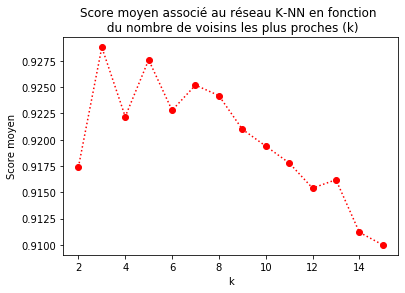

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.title("Score moyen associé au réseau K-NN en fonction \n du nombre de voisins les plus proches (k)")
plt.plot(np.array(k_list), np.array(score_k_list), "r:o")
plt.xlabel("k")
plt.ylabel("Score moyen")
plt.show()

In [9]:
#affichage des scores de test du modèle K-NN pour k=3 et en faisant varier le poucentage 
#d'échantillons entraînés entre 0.1 et 0.9 (pas = 0,1)
score_p_list=[]
p_list = []

for p in range(1,10):
    realp = p/10
    p_list.append(realp)
    xtrain_p, xtest_p, ytrain_p, ytest_p = ms.train_test_split(data, target,train_size=realp)
    clf_p = nb.KNeighborsClassifier (n_neighbors=3)
    clf_p.fit(xtrain, ytrain)
    score_p = clf_p.score(xtest_p, ytest_p)
    score_p_list.append(score_p)
    print("pourcentage = ",realp,"; score = ",score_p )

pourcentage =  0.1 ; score =  0.9533333333333334
pourcentage =  0.2 ; score =  0.95225
pourcentage =  0.3 ; score =  0.954
pourcentage =  0.4 ; score =  0.955
pourcentage =  0.5 ; score =  0.9548
pourcentage =  0.6 ; score =  0.9495
pourcentage =  0.7 ; score =  0.9533333333333334
pourcentage =  0.8 ; score =  0.952
pourcentage =  0.9 ; score =  0.964


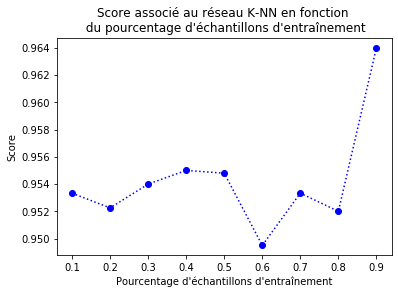

In [17]:
%matplotlib inline 

plt.title("Score associé au réseau K-NN en fonction \n du pourcentage d'échantillons d'entraînement")
plt.plot(np.array(p_list), np.array(score_p_list), "b:o")
plt.xlabel("Pourcentage d'échantillons d'entraînement")
plt.ylabel("Score")
plt.show()

In [10]:
#affichage des scores de test du modèle K-NN pour k=3 et en faisant varier la taille
#d'échantillons entrainés entre 10000 et 10000 (pas=1000)
#pourcentage échantillons entraînés = 0.7

score_t_list=[]
t_list=[]
for t in range(1000,46000,5000):
    t_list.append(t)
    dataCoeff = np.random.randint(70000, size=t)
    dataT=[]
    targetT=[]
    for c in dataCoeff :
        dataT.append(mnist.data[c])
        targetT.append(mnist.target[c])
    xtrain_t, xtest_t, ytrain_t, ytest_t = ms.train_test_split(dataT, targetT,train_size=0.7)
    clf_t = nb.KNeighborsClassifier (n_neighbors=3)
    clf_t.fit(xtrain_t, ytrain_t)
    score_t = clf_t.score(xtest_t, ytest_t)
    score_t_list.append(score_t)
    print("taille échantillon = ",t,"; score = ",score_t )
    

taille échantillon =  1000 ; score =  0.8733333333333333
taille échantillon =  6000 ; score =  0.9366666666666666
taille échantillon =  11000 ; score =  0.941532868827628
taille échantillon =  16000 ; score =  0.9495833333333333
taille échantillon =  21000 ; score =  0.9574670687192509
taille échantillon =  26000 ; score =  0.963974358974359
taille échantillon =  31000 ; score =  0.9636559139784946
taille échantillon =  36000 ; score =  0.9662037037037037
taille échantillon =  41000 ; score =  0.9680513779367531


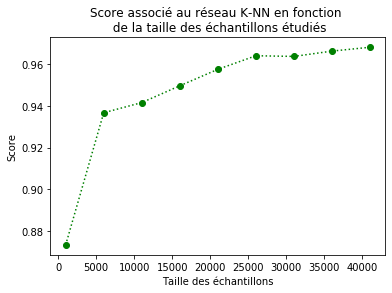

In [19]:
plt.title("Score associé au réseau K-NN en fonction \n de la taille des échantillons étudiés")
plt.plot(np.array(t_list), np.array(score_t_list), "g:o")
plt.xlabel("Taille des échantillons")
plt.ylabel("Score")
plt.show()

In [11]:
#affichage des scores de test du modèle K-NN pour k=3 et en faisant varier le type 
#de distance utilisé (paramètre p variant de 1 à 5)
#pourcentage échantillons entraînés = 0.8
#taille échantillon = 50000

score_m_list=[]
m_list = []

for m in range (1,6):
    m_list.append(m)
    clf_m = nb.KNeighborsClassifier (n_neighbors=3,p=m)
    clf_m.fit(xtrain, ytrain)
    score_m = clf_m.score(xtest, ytest)
    score_m_list.append(score_m)
    print("paramètre p = ",m,"; score = ",score_m )


paramètre p =  1 ; score =  0.911
paramètre p =  2 ; score =  0.928
paramètre p =  3 ; score =  0.934
paramètre p =  4 ; score =  0.937
paramètre p =  5 ; score =  0.937


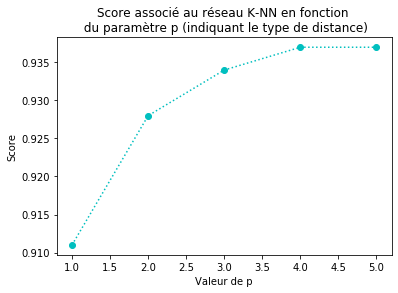

In [21]:
plt.title("Score associé au réseau K-NN en fonction \n du paramètre p (indiquant le type de distance)")
plt.plot(np.array(m_list), np.array(score_m_list), "c:o")
plt.xlabel("Valeur de p")
plt.ylabel("Score")
plt.show()

In [12]:
#comparaison impact de l'utilisation de tout le processeur ou just un job (paramètre n_jobs 1 ou -1)
#taille échantillon = 5000
#k=3
#pourcentage d'échantillons entraînés = 0.8

import time
execTime = []

for n in [1,-1]:
    clf = nb.KNeighborsClassifier (n_neighbors=3,n_jobs=n)
    deb=time.time()
    clf.fit(xtrain, ytrain)
    clf.score(xtest, ytest)
    fin=time.time()
    execTime.append(fin-deb)
print("temps d'exécution pour un job en parallèle = ",execTime[0])
print("temps d'exécution en utilisant tout le processeur = ",execTime[1])

temps d'exécution pour un job en parallèle =  6.272858142852783
temps d'exécution en utilisant tout le processeur =  2.2276153564453125
